In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = "../data.csv"
df = pd.read_csv(file_path)

In [3]:
# Convert "Date & Time" to datetime
df["Date & Time"] = pd.to_datetime(df["Date & Time"], format="%B %d, %Y,%I:%M%p")

# Sort by date and time
df = df.sort_values(by="Date & Time")

In [4]:
df.head()

,Account Name,Date & Time,Activity Details,Amount ($ / Meals)
10,Dining Dollars,2025-01-21 09:06:00,Sim - SBX1,2.65
9,Dining Dollars,2025-01-21 12:03:00,Sim - Gorillas3,7.28
8,Dining Dollars,2025-01-21 18:11:00,Sim - GibsonDining1,9.50
7,Dining Dollars,2025-01-22 08:16:00,Sim - GibsonDining1,9.00
6,Dining Dollars,2025-01-22 10:32:00,Sim - SBX1,2.65


In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [6]:
model = SimpleExpSmoothing(df["Amount ($ / Meals)"])


d:\Program\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
fit = model.fit(smoothing_level=0.2, optimized=False)

In [9]:
fitted_values = fit.fittedvalues

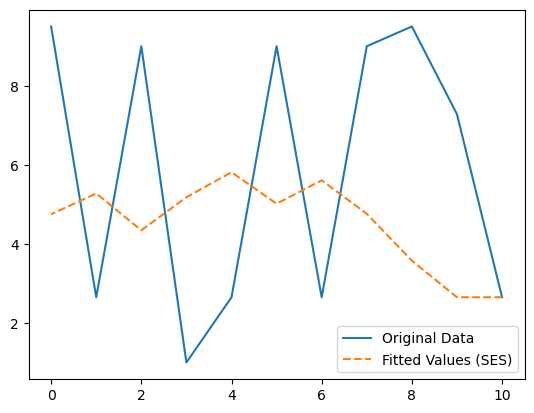

In [11]:
plt.plot(df["Amount ($ / Meals)"], label='Original Data')
plt.plot(fitted_values, label='Fitted Values (SES)', linestyle='--')
plt.legend()
plt.show()